# 自学习

| 更新时间 | 负责人 | 内容 | 备注 |
| --- | --- | --- | --- |
| 2021年1月4日 | Rui | 初次编写文档 | ---- |
| 2021年1月8日 | dianjixz | 修改文档的编写方式 | 使用 Jupyter notebook 进行编写文档 |
| 2021年1月18日 | Rui | 修改文档，增加效果图 | 通过测试的平台有 MaixII-Dock，使用的是 MaixPy3 0.4.0 |

## 运行效果

<iframe src="//player.bilibili.com/player.html?aid=808318247&bvid=BV1C34y1i7QZ&cid=487776187&page=1" scrolling="no" border="0" frameborder="no" framespacing="0" allowfullscreen="true"> </iframe>

## 准备

- 在 [MaixHub](https://www.maixhub.com/modelInfo?modelId=24) 上获取模型文件和运行源码（最新版本的系统内置了模型文件 `/home/model/resnet18_1000_awnn*`）
- 确认 MaixPy3 版本为 0.4.0 以上
- 使用的硬件为 MaixII-Dock
- 内存卡内是最新版本的镜像系统
- 插卡启动硬件

## 自学习训练与保存

将模型读取到python环境中！

In [1]:
from maix import nn
from maix import camera, display
import time
from maix.nn.app.classifier import Classifier

class Self_learn:
    model = {
        "param": "/home/model/resnet18_1000_awnn.param",
        "bin": "/home/model/resnet18_1000_awnn.bin"
    }
    options = {
        "model_type":  "awnn",
        "inputs": {
            "input0": (224, 224, 3)
        },
        "outputs": {
            "190": (1, 1, 512)
        },
        "mean": [127.5, 127.5, 127.5],
        "norm": [0.0176, 0.0176, 0.0176],
    }
    class_num = 3  #学习类别
    sample_num = 15  #学习类别总数量
    curr_class = 0
    curr_sample = 0    
    def __init__(self):
        from maix import nn
        from maix.nn.app.classifier import Classifier
        print("-- load model:", self.model)
        self.m = nn.load(self.model, opt=self.options)
        print("-- load ok")
        print("-- load classifier")
        self.classifier = Classifier(self.m, self.class_num, self.sample_num, 512, 224, 224)
        print("-- load ok")
global self_learn
self_learn = Self_learn()

[ rpyc-kernel ]( running at Wed Jan 19 15:42:31 2022 )
-- load model: {'param': '/home/model/resnet18_1000_awnn.param', 'bin': '/home/model/resnet18_1000_awnn.bin'}
-- load ok
-- load classifier
-- load ok


添加需要进行识别分类的类别，按下右键进行选择，可以添加3个类别

In [1]:
import time
from maix import nn
from maix import camera, display
for x in range(3):
    t = time.time()
    while True:
        if (time.time() - t) > 2:
            img = camera.capture()
            AI_img = img.copy().resize(224, 224)
            self_learn.classifier.add_class_img(AI_img.tobytes())
            time.sleep(2)
            break
        img = camera.capture()
    

[ rpyc-kernel ]( running at Wed Jan 19 15:42:48 2022 )
[camera] run config(size=(w, h)) before capture.
[camera] config input size(240, 240)


给每个类别拍摄数据集，按下右键，分别拍摄5张图片依次拍摄，顺序和添加类别的相同

In [1]:
import time
from maix import nn
from maix import camera, display

for x in range(3):
    t = time.time()
    while True:
        if (time.time() - t) > 2:
            for i in range(5):
                img = camera.capture()
                AI_img = img.copy().resize(224, 224)
                self_learn.classifier.add_sample_img(AI_img.tobytes())
            time.sleep(2)
            break
        img = camera.capture()
        AI_img = img.copy().resize(224, 224)

[ rpyc-kernel ]( running at Wed Jan 19 15:43:11 2022 )


进行图片自学习

In [1]:
self_learn.classifier.train()

[ rpyc-kernel ]( running at Wed Jan 19 15:43:29 2022 )


训练结束后保存模型

In [1]:
self_learn.classifier.save("./module.bin")

[ rpyc-kernel ]( running at Wed Jan 19 15:43:36 2022 )


开始进行分类验证

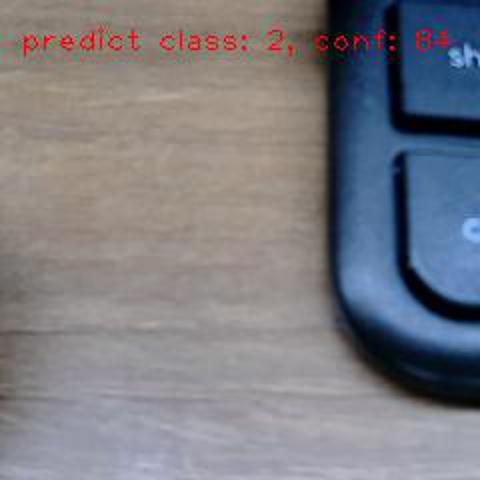

predict class: 2, conf: 84



Traceback (most recent call last):
  File "<string>", line unknown, in <module>
Remote.KeyboardInterrupt


In [1]:
import time
from maix import nn
from maix import camera, display
while True:
    img = camera.capture()
    AI_img = img.copy().resize(224, 224)
    idx, distance = self_learn.classifier.predict(AI_img.tobytes())
    msg = "predict class: " + str(idx+1) + ", conf: " + str(100-distance)
    print(msg)
    img.draw_string(10, 10, msg, color = (255, 0, 0))  
    display.show(img)

## 自学习模型恢复

In [1]:
from maix import nn
from maix import camera, display
import time
from maix.nn.app.classifier import Classifier
from maix.nn.app.classifier import load

class Self_learn:
    model = {
        "param": "/home/model/resnet18_1000_awnn.param",
        "bin": "/home/model/resnet18_1000_awnn.bin"
    }
    options = {
        "model_type":  "awnn",
        "inputs": {
            "input0": (224, 224, 3)
        },
        "outputs": {
            "190": (1, 1, 512)
        },
        "mean": [127.5, 127.5, 127.5],
        "norm": [0.0176, 0.0176, 0.0176],
    }
    class_num = 3  #学习类别
    sample_num = 15  #学习类别总数量
    curr_class = 0
    curr_sample = 0    
    def __init__(self):
        from maix import nn
        from maix.nn.app.classifier import Classifier        
        from maix.nn.app.classifier import load
        import os.path
        if os.path.isfile("./module.bin"):
            print("-- load model:", self.model)
            self.m = nn.load(self.model, opt=self.options)
            print("-- load ok")
            print("-- load classifier")
            self.classifier = load(self.m,"./module.bin")
            print("-- load ok")
        else:
            print("not have model!")
            print("please run nn_self_learn_classifier.py get model!")

        
global self_learn
self_learn = Self_learn()

[ rpyc-kernel ]( running at Wed Jan 19 15:44:46 2022 )
-- load model: {'param': '/home/model/resnet18_1000_awnn.param', 'bin': '/home/model/resnet18_1000_awnn.bin'}
-- load ok
-- load classifier
-- load ok


自学习预测

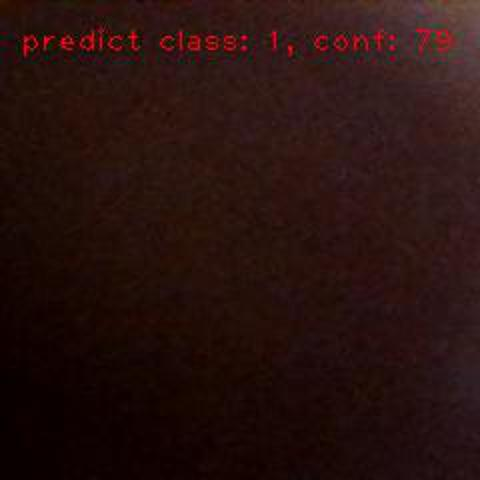


Traceback (most recent call last):
  File "<string>", line unknown, in <module>
Remote.KeyboardInterrupt


In [1]:
import time
from maix import nn
from maix import camera, display
while True:
    img = camera.capture()
    AI_img = img.copy().resize(224, 224)
    idx, distance = self_learn.classifier.predict(AI_img.tobytes())
    msg = "predict class: " + str(idx+1) + ", conf: " + str(100-distance)
#     print(msg)
    img.draw_string(10, 10, msg, color = (255, 0, 0))  
    display.show(img)